In [29]:
import matplotlib.pyplot as plt


In [30]:
import numpy as np

In [31]:
import pandas as pd

In [32]:
    dataArray = {   "Home": ["Arsenal", 2, 53.2, 10, 4, 2, 701, 87, 48],
                    "Away": ["Tottenham", 0, 46.8, 6, 3, 2, 350, 81, 58],
                    "Max":  ["None", 10, 100.0, 20, 20, 20, 1000, 100, 100]}
    data = pd.DataFrame( dataArray, index=[ "TeamName", "Score", "Possesion", "Shots", "Shots on Target", "Created Chance", "Passes", "Completed Passes", "Duels"] )

In [33]:
data

,Home,Away,Max
TeamName,Arsenal,Tottenham,None
Score,2,0,10
Possesion,53.2,46.8,100
Shots,10,6,20
Shots on Target,4,3,20
Created Chance,2,2,20
Passes,701,350,1000
Completed Passes,87,81,100
Duels,48,58,100


In [34]:
for row in data.index:
    id = data.index.get_loc(row)
    data["Max"].iloc[id] = data["Home"].iloc[id] + data["Away"].iloc[id]

In [35]:
data

,Home,Away,Max
TeamName,Arsenal,Tottenham,ArsenalTottenham
Score,2,0,2
Possesion,53.2,46.8,100
Shots,10,6,16
Shots on Target,4,3,7
Created Chance,2,2,4
Passes,701,350,1051
Completed Passes,87,81,168
Duels,48,58,106


In [36]:
data["Max"] = data["Home"] + data["Away"]

In [37]:
data

,Home,Away,Max
TeamName,Arsenal,Tottenham,ArsenalTottenham
Score,2,0,2
Possesion,53.2,46.8,100
Shots,10,6,16
Shots on Target,4,3,7
Created Chance,2,2,4
Passes,701,350,1051
Completed Passes,87,81,168
Duels,48,58,106


In [38]:
teamNameId = data.index.get_loc("TeamName")
data["Max"].iloc[teamNameId] = ""

In [39]:
data

,Home,Away,Max
TeamName,Arsenal,Tottenham,
Score,2,0,2
Possesion,53.2,46.8,100
Shots,10,6,16
Shots on Target,4,3,7
Created Chance,2,2,4
Passes,701,350,1051
Completed Passes,87,81,168
Duels,48,58,106


In [40]:
vis_data = data.drop("TeamName")

In [41]:
vis_data

,Home,Away,Max
Score,2,0,2
Possesion,53.2,46.8,100
Shots,10,6,16
Shots on Target,4,3,7
Created Chance,2,2,4
Passes,701,350,1051
Completed Passes,87,81,168
Duels,48,58,106


In [42]:
vis_data["Home"] = 100 * vis_data["Home"] / vis_data["Max"]

In [43]:
vis_data["Away"] = 100 * vis_data["Away"] / vis_data["Max"]

In [44]:
vis_data

,Home,Away,Max
Score,100,0,2
Possesion,53.2,46.8,100
Shots,62.5,37.5,16
Shots on Target,57.1429,42.8571,7
Created Chance,50,50,4
Passes,66.6984,33.3016,1051
Completed Passes,51.7857,48.2143,168
Duels,45.283,54.717,106


In [45]:
x_array = np.arange(len(vis_data.index))

In [46]:
x_array

array([0, 1, 2, 3, 4, 5, 6, 7])

In [47]:
face_color = {"Home":"red", "Away":"blue"}

In [48]:
left_data = pd.Series(np.zeros(len(vis_data.index)), index=vis_data.index.to_list())

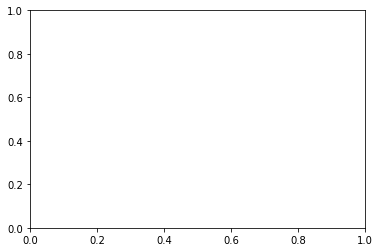

In [49]:
fig, ax = plt.subplots()

In [50]:
ax.set_xticks([])
ax.set_ylim([len(vis_data.index), -1])
ax.set_xlim([0,100])

(0, 100)

In [55]:
for i in range(len(vis_data.columns)):
    if vis_data.columns[i] != "Max":
        bar_list = ax.barh( x_array, vis_data[vis_data.columns[i]], left=left_data, edgecolor="White", linewidth=0.5, tick_label=vis_data.index.values, alpha = 0.6)
        for j in range(len(bar_list)):
            bar_list[j].set_facecolor(face_color[vis_data.columns[i]])
            bar_list[i].set_alpha(0.8)
        left_data += vis_data[vis_data.columns[i]]



In [56]:
    ax.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
    ax.spines["right"].set_color("none")  # 右消し
    ax.spines["left"].set_color("none")   # 左消し
    ax.spines["top"].set_color("none")    # 上消し
    ax.spines["bottom"].set_color("none")  # 下消し

In [57]:
space = 1
x = 50
y = 0

for i in range(len(vis_data.index)):
    row = vis_data.index[i]
    dataId = data.index.get_loc(row)
    homeNum = data["Home"].iloc[dataId]
    awayNum = data["Away"].iloc[dataId]

    ax.text(  5, y, homeNum, size=12, color="white",  ha="center", va="center")
    ax.text( 95, y, awayNum, size=12, color="white", ha="center", va="center")

    y+=space

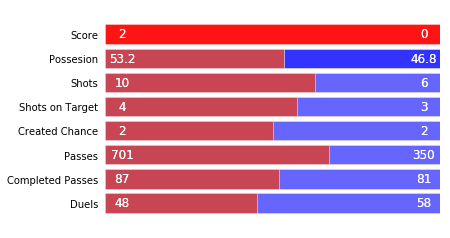

In [58]:
fig

In [61]:
fig.set_facecolor("darkgray")

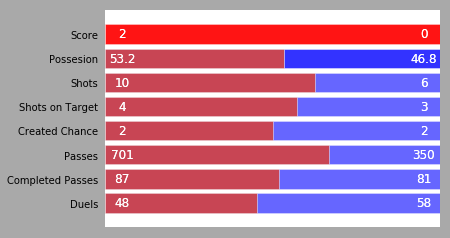

In [62]:
fig
